In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [42]:
df=pd.read_excel('train.xlsx')


In [43]:
df.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [44]:
X=df.x
y=df.y
X=np.array(X)
y=np.array(y)

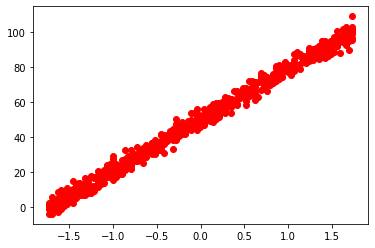

In [46]:
mean=np.mean(X)
std=np.std(X)
X=(X-mean)/std #standardisation on X
plt.scatter(X,y,color='red')

# LINEAR REGRESSION USING GRADIENT DESCENT

In [47]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x         #euqation of hypthosis function

def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        x=X[i]
        y=Y[i]
        y_=hypothesis(x,theta)
        grad[0]+=y_- y         #gradient descent formula
        grad[1]+=(y_- y)*x
    return grad/m

def error(X,Y,theta):   #used to calculate sum of residual errors after each iteration
    m=X.shape[0]
    error=0.0
    for i in range(m):
        error+= (y[i]-hypothesis(X[i],theta))**2   #cost function
    return error/m

def gradientdescent(X,Y,maxsteps=100,learning_rate=0.1):
    theta=np.zeros((2,))    #array of 2rows 1 col
    errorlist=[]
    for i in range(maxsteps):
        e=error(X,Y,theta)
        errorlist.append(e)
        grad=gradient(X,Y,theta)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    return theta,errorlist

[49.9385427  28.95206401]


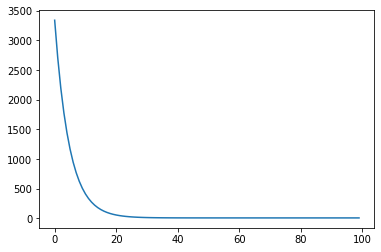

In [48]:
theta,errorlist=gradientdescent(X,y)
print(theta)
plt.plot(errorlist)
# as we can see we get the minimum sum of residuals at 20th iteration itself

# Plotting the best fit line

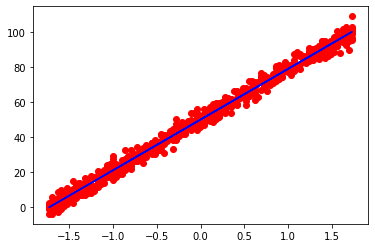

In [49]:
y_=hypothesis(X,theta)
plt.scatter(X,y,color='red')
plt.plot(X,y_,color='blue')
plt.show()

# plotting predicted values versus test values....

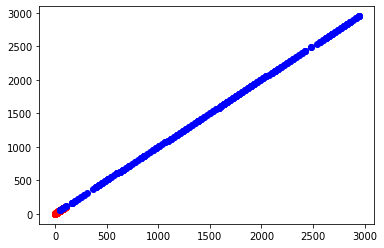

In [53]:
df_test=pd.read_csv('test.csv')
X_test=df_test.x
y_test=df_test.y
y_pred=hypothesis(X_test,theta)
plt.scatter(y_test,y_test,color='red')
plt.scatter(y_pred,y_pred,color='blue')

# calculating r2 value for the model

In [50]:
def rsquare(y,y_):
    num=np.mean((y-y_)**2)
    deno=np.mean((y-np.mean(y))**2)
    error=1-num/deno
    return error*100
rsquare(y,y_)

99.07015291241113